In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Mehmet Ersolak/Documents/GitHub/Data_Science_Project/Analyzing Google Play Apps/Data_Set/googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='str')

In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  str    
 1   Category        10841 non-null  str    
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  str    
 4   Size            10841 non-null  str    
 5   Installs        10841 non-null  str    
 6   Type            10840 non-null  str    
 7   Price           10841 non-null  str    
 8   Content Rating  10840 non-null  str    
 9   Genres          10841 non-null  str    
 10  Last Updated    10841 non-null  str    
 11  Current Ver     10833 non-null  str    
 12  Android Ver     10838 non-null  str    
dtypes: float64(1), str(12)
memory usage: 1.1 MB


#  Kolon Çevrimleri ve Veri Temizliği (Preprocessing)

## 1-) Reviews

In [7]:
df['Reviews'].str.isnumeric().value_counts()

Reviews
True     10840
False        1
Name: count, dtype: int64

In [8]:
df[df['Reviews'].str.isnumeric() == False]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
df_clean = df.copy()

In [10]:
df_clean.drop(df_clean.index[10472], inplace= True)

In [11]:
df_clean[df_clean['Reviews'].str.isnumeric() == False]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [12]:
df_clean['Reviews'].str.isnumeric().value_counts()

Reviews
True    10840
Name: count, dtype: int64

In [13]:
df_clean['Reviews'] = df_clean['Reviews'].astype(int)
df_clean['Reviews'].info()

<class 'pandas.Series'>
Index: 10840 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype
--------------  -----
10840 non-null  int64
dtypes: int64(1)
memory usage: 169.4 KB


## 2) Size

In [14]:
df_clean['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
552k                     1
885k                     1
1020k                    1
582k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [15]:
df_clean['Size'].unique()

<StringArray>
[  '19M',   '14M',  '8.7M',   '25M',  '2.8M',  '5.6M',   '29M',   '33M',
  '3.1M',   '28M',
 ...
  '467k',  '157k',   '44k',  '676k',   '67k',  '552k',  '885k', '1020k',
  '582k',  '619k']
Length: 461, dtype: str

In [16]:
df_clean['Size'] = df_clean['Size'].str.replace('M','000')
df_clean['Size'] = df_clean['Size'].str.replace('k','')

In [17]:
df_clean['Size'].unique()

<StringArray>
[ '19000',  '14000', '8.7000',  '25000', '2.8000', '5.6000',  '29000',
  '33000', '3.1000',  '28000',
 ...
    '467',    '157',     '44',    '676',     '67',    '552',    '885',
   '1020',    '582',    '619']
Length: 461, dtype: str

In [18]:
df_clean['Size'].value_counts()

Size
Varies with device    1695
11000                  198
12000                  196
14000                  194
13000                  191
                      ... 
552                      1
885                      1
1020                     1
582                      1
619                      1
Name: count, Length: 461, dtype: int64

In [19]:
df_clean[df_clean['Size'] == 'Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


In [20]:
df_clean['Size'] = df_clean['Size'].replace('Varies with device', np.nan) 

In [21]:
df_clean['Size'] = df_clean['Size'].astype(float)

In [22]:
df_clean['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [23]:
df_clean['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [24]:
df_clean.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

## 3) Installs

In [25]:
df_clean['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [26]:
df_clean['Installs'].unique()

<StringArray>
[       '10,000+',       '500,000+',     '5,000,000+',    '50,000,000+',
       '100,000+',        '50,000+',     '1,000,000+',    '10,000,000+',
         '5,000+',   '100,000,000+', '1,000,000,000+',         '1,000+',
   '500,000,000+',            '50+',           '100+',           '500+',
            '10+',             '1+',             '5+',             '0+',
              '0']
Length: 21, dtype: str

In [27]:
df_clean['Installs'] = df_clean['Installs'].str.replace('+','')
df_clean['Installs'] = df_clean['Installs'].str.replace(',','')

In [28]:
df_clean['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [29]:
df_clean['Installs'] = df_clean['Installs'].astype(int)

In [30]:
df_clean['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

## 4) Price

In [31]:
df_clean['Price'].value_counts()

Price
0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$3.61          1
$394.99        1
$1.26          1
$1.20          1
$1.04          1
Name: count, Length: 92, dtype: int64

In [32]:
df_clean['Price'].unique()

<StringArray>
[      '0',   '$4.99',   '$3.99',   '$6.99',   '$1.49',   '$2.99',   '$7.99',
   '$5.99',   '$3.49',   '$1.99',   '$9.99',   '$7.49',   '$0.99',   '$9.00',
   '$5.49',  '$10.00',  '$24.99',  '$11.99',  '$79.99',  '$16.99',  '$14.99',
   '$1.00',  '$29.99',  '$12.99',   '$2.49',  '$10.99',   '$1.50',  '$19.99',
  '$15.99',  '$33.99',  '$74.99',  '$39.99',   '$3.95',   '$4.49',   '$1.70',
   '$8.99',   '$2.00',   '$3.88',  '$25.99', '$399.99',  '$17.99', '$400.00',
   '$3.02',   '$1.76',   '$4.84',   '$4.77',   '$1.61',   '$2.50',   '$1.59',
   '$6.49',   '$1.29',   '$5.00',  '$13.99', '$299.99', '$379.99',  '$37.99',
  '$18.99', '$389.99',  '$19.90',   '$8.49',   '$1.75',  '$14.00',   '$4.85',
  '$46.99', '$109.99', '$154.99',   '$3.08',   '$2.59',   '$4.80',   '$1.96',
  '$19.40',   '$3.90',   '$4.59',  '$15.46',   '$3.04',   '$4.29',   '$2.60',
   '$3.28',   '$4.60',  '$28.99',   '$2.95',   '$2.90',   '$1.97', '$200.00',
  '$89.99',   '$2.56',  '$30.99',   '$3.61', '$394

In [33]:
df_clean['Price'] = df_clean['Price'].str.replace('$','')

In [34]:
df_clean['Price'].value_counts()

Price
0         10040
0.99        148
2.99        129
1.99         73
4.99         72
          ...  
3.61          1
394.99        1
1.26          1
1.20          1
1.04          1
Name: count, Length: 92, dtype: int64

In [35]:
df_clean['Price'] = df_clean['Price'].astype(float)
df_clean['Price'].value_counts()

Price
0.00      10040
0.99        148
2.99        129
1.99         73
4.99         72
          ...  
3.61          1
394.99        1
1.26          1
1.20          1
1.04          1
Name: count, Length: 92, dtype: int64

In [36]:
df_clean['Price'].info()

<class 'pandas.Series'>
Index: 10840 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
10840 non-null  float64
dtypes: float64(1)
memory usage: 169.4 KB


* Bireden fazla kolonda karakter silme işlemi yapıyorsak bu işlemlerin hepsini teker teker manuel bir şekilde yapmaktansa
iç içe for loop kullanarak bir satırda halledebiliriz
```python
  - chars_to_remove=["+",",","$"]
    cols_to_clean=["Installs","Price"]
    for item in chars_to_remove:
        for cols in cols_to_clean:
            df_clean[cols]=df_clean[cols].str.replace(item,"")
```

## Tarihler ile Çalışma

In [37]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [38]:
df_clean['Last Updated'].value_counts()

Last Updated
August 3, 2018       326
August 2, 2018       304
July 31, 2018        294
August 1, 2018       285
July 30, 2018        211
                    ... 
November 25, 2014      1
May 19, 2016           1
January 20, 2014       1
February 16, 2014      1
March 23, 2014         1
Name: count, Length: 1377, dtype: int64

In [39]:
df_clean['Last Updated'].unique()

<StringArray>
[   'January 7, 2018',   'January 15, 2018',     'August 1, 2018',
       'June 8, 2018',      'June 20, 2018',     'March 26, 2017',
     'April 26, 2018',      'June 14, 2018', 'September 20, 2017',
       'July 3, 2018',
 ...
  'November 23, 2015',      'June 17, 2012',  'February 27, 2015',
  'December 18, 2013',   'February 6, 2012',  'November 25, 2014',
       'May 19, 2016',   'January 20, 2014',  'February 16, 2014',
     'March 23, 2014']
Length: 1377, dtype: str

In [40]:
df_clean['Last Updated'] = pd.to_datetime(df_clean['Last Updated'])

In [41]:
df_clean['Last Updated'].info()

<class 'pandas.Series'>
Index: 10840 entries, 0 to 10840
Series name: Last Updated
Non-Null Count  Dtype         
--------------  -----         
10840 non-null  datetime64[us]
dtypes: datetime64[us](1)
memory usage: 169.4 KB


In [42]:
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


* Eğerki Tarihsel işlemlerde tarih verileri bizim için çok önem arz ediyorsa ve bunları gün ay yıl şeklinde ayrı kolanlarda görmek istiyorsak veri setindeki tarihsel kolunu datatime'a çevirdikten sonra şu komutlar ile kolon ayrımı yapabiliyoruz
 ```python
     df_clean["Day"]=df_clean["Last Updated"].dt.day
     df_clean["Month"]=df_clean["Last Updated"].dt.month
     df_clean["Year"]=df_clean["Last Updated"].dt.year
 ```
 Bizde Örnek olarak Yıl'ı ayrı olarak alalım çünkü belki bir uygulumanın en son hangi yılda güncellendiği bizim için önemli olabilir.
  ```python
 df_clean["Year"]=df_clean["Last Updated"].dt.year
  ```

In [43]:
df_clean['Year'] = df_clean['Last Updated'].dt.year
df_clean

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,2015


In [44]:
df_clean.info()

<class 'pandas.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  str           
 1   Category        10840 non-null  str           
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  str           
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  str           
 9   Genres          10840 non-null  str           
 10  Last Updated    10840 non-null  datetime64[us]
 11  Current Ver     10832 non-null  str           
 12  Android Ver     10838 non-null  str           
 13  Year            10840 non-null  int32         
dtypes: datetime64[us](1), float64(3), int32(1), int64(2), str(7)
memory us

# Keşifsel Veri Analizi (exploratory data analysis)

In [45]:
df_clean.info()

<class 'pandas.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  str           
 1   Category        10840 non-null  str           
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  str           
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  str           
 9   Genres          10840 non-null  str           
 10  Last Updated    10840 non-null  datetime64[us]
 11  Current Ver     10832 non-null  str           
 12  Android Ver     10838 non-null  str           
 13  Year            10840 non-null  int32         
dtypes: datetime64[us](1), float64(3), int32(1), int64(2), str(7)
memory us

In [46]:
df_clean.duplicated('App').value_counts() 

False    9659
True     1181
Name: count, dtype: int64

* 1181 tane App kolon başlığına göre aynı veriler bulunmaktadır

In [47]:
df_clean[df_clean.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,2018


In [48]:
df_clean[df_clean['App'] == 'Box']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
204,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,2018
265,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,2018


In [49]:
df_clean = df_clean.drop_duplicates('App', keep='first')
df_clean.duplicated('App').value_counts()

False    9659
Name: count, dtype: int64

In [50]:
df_clean.info()

<class 'pandas.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   str           
 1   Category        9659 non-null   str           
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   int64         
 6   Type            9658 non-null   str           
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   str           
 9   Genres          9659 non-null   str           
 10  Last Updated    9659 non-null   datetime64[us]
 11  Current Ver     9651 non-null   str           
 12  Android Ver     9657 non-null   str           
 13  Year            9659 non-null   int32         
dtypes: datetime64[us](1), float64(3), int32(1), int64(2), str(7)
memory usa

In [51]:
df_clean['App'].dtype

<StringDtype(storage='python', na_value=nan)>

In [52]:
df_clean['Price'].dtype

dtype('float64')

In [53]:
numeric_features = [feature for feature in df_clean.columns if df_clean[feature].dtype != 'string']
categorical_features = [feature for feature in df_clean.columns if df_clean[feature].dtype == 'string']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Year']

We have 7 categorical features : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


## Sayısal Değişkenlerin Garfikleri (Graphs of Numerical Variables)

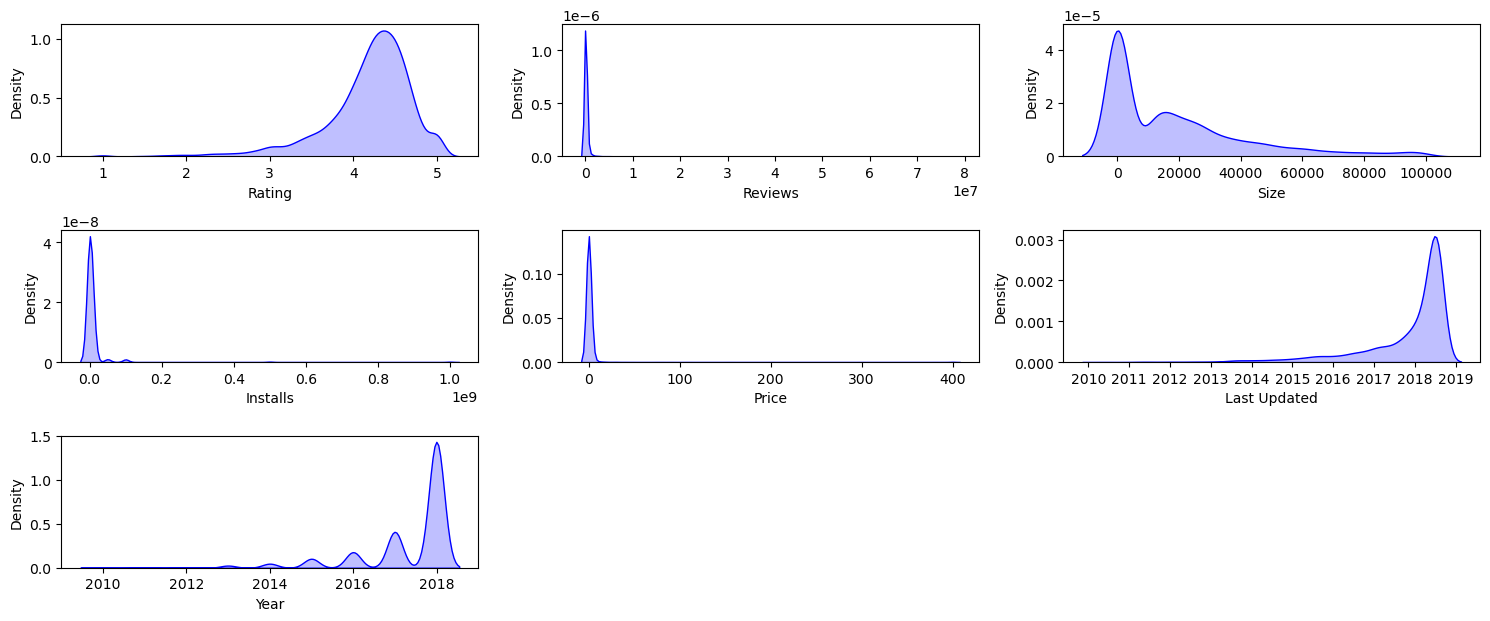

In [54]:
plt.figure(figsize = (15,10))

for i in range(0, len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x= df_clean[numeric_features[i]], color = 'blue', fill=True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
plt.show()

## Kategorik Değişkenlerin Grafikleri (Graphs of Categorical Variables)

<Axes: xlabel='Genres'>

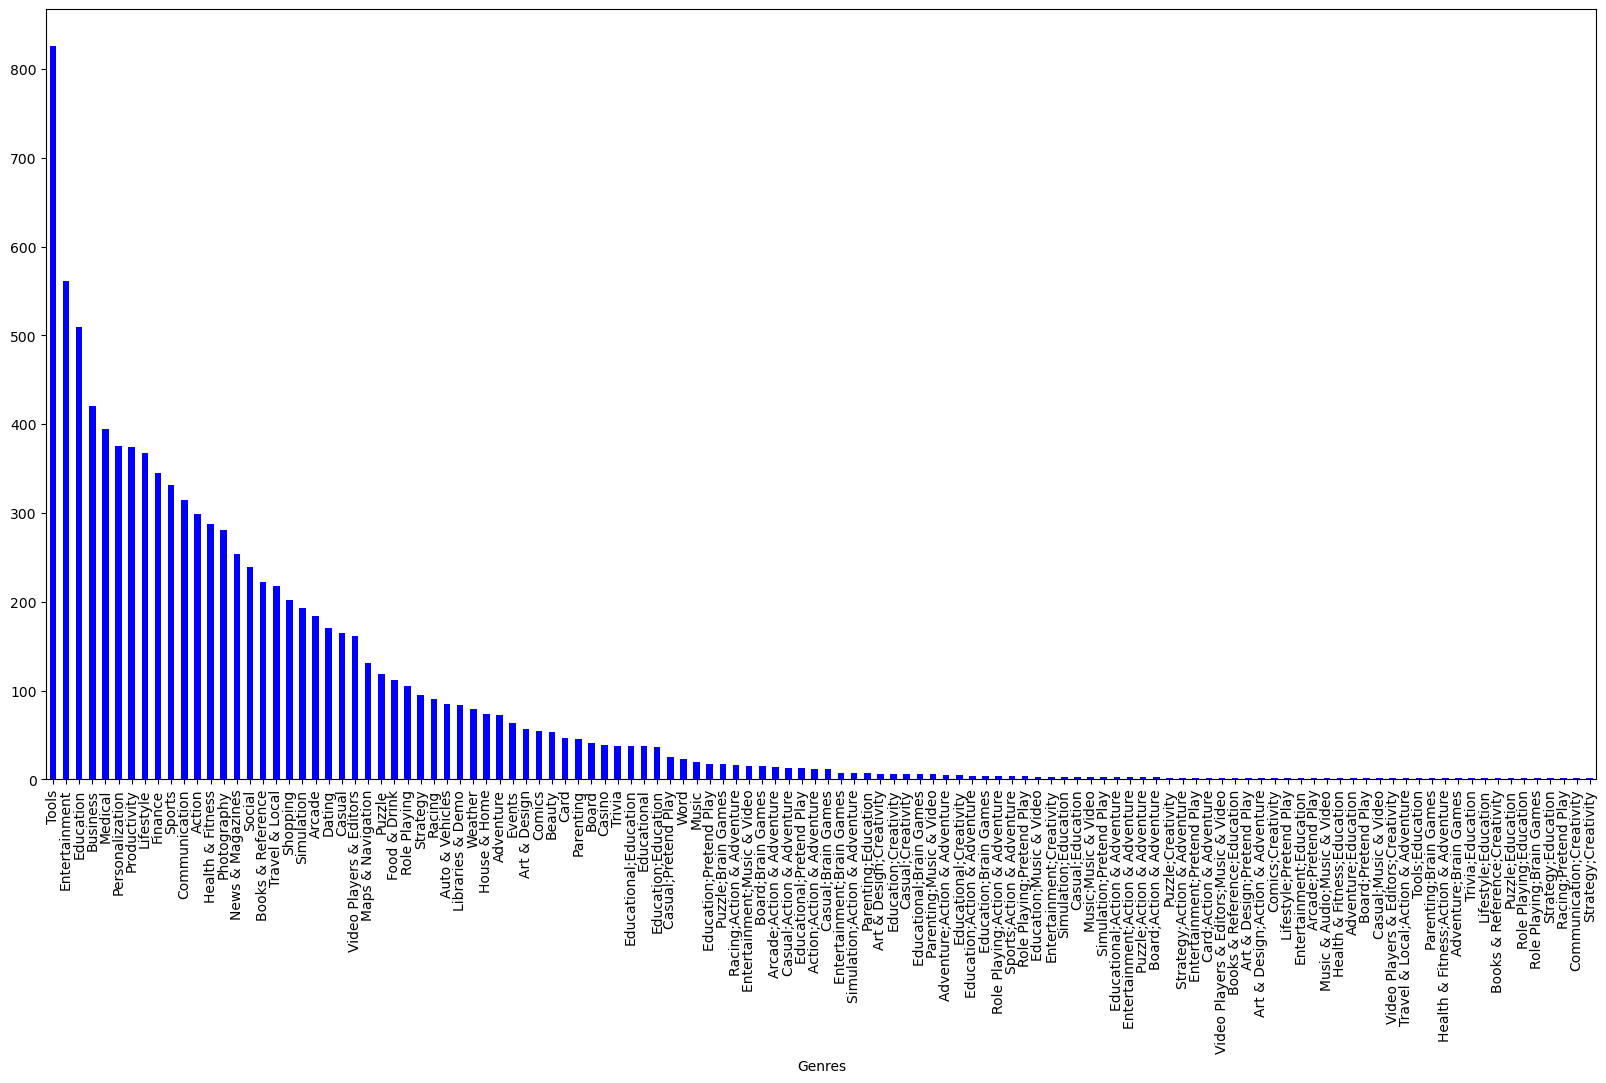

In [114]:
df_clean['Genres'].value_counts().plot(figsize = (20,10),kind='bar', color = 'Blue')

<Axes: xlabel='Genres'>

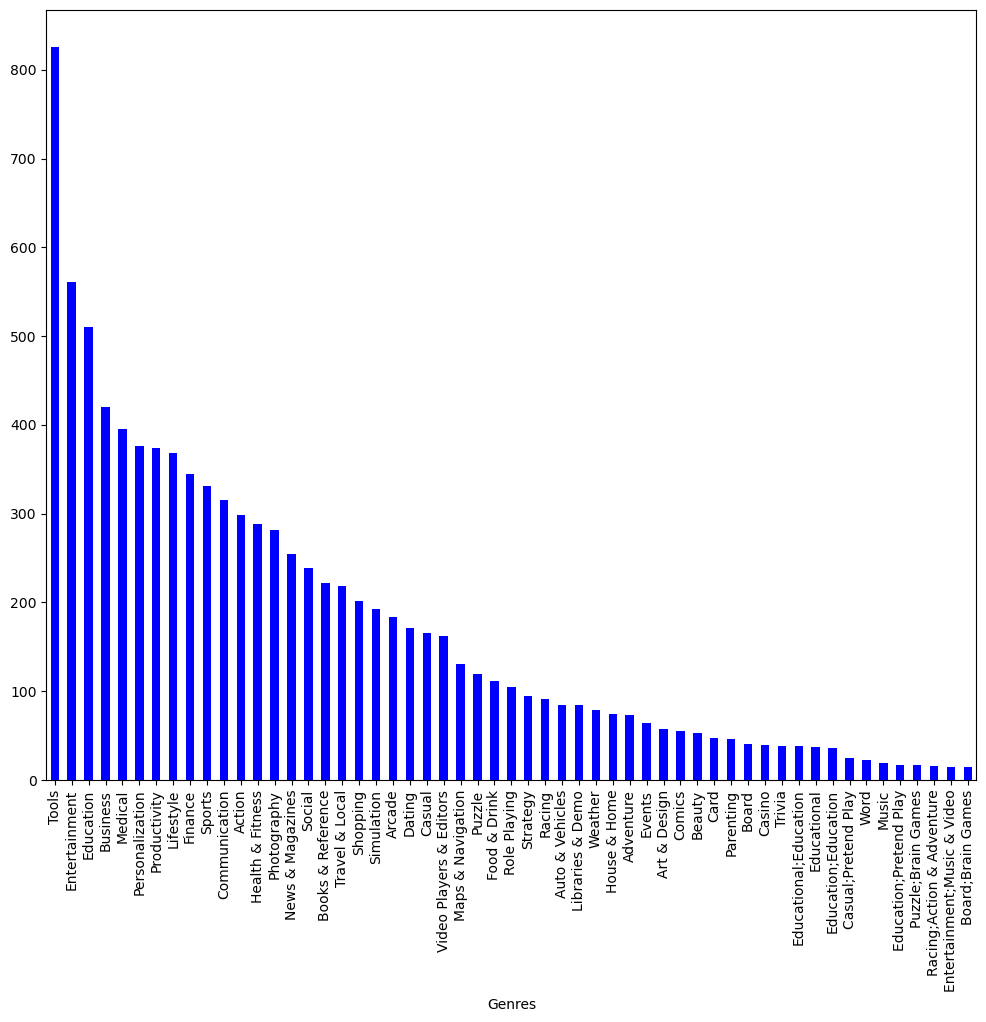

In [115]:
df_clean['Genres'].value_counts().head(55).plot(
    figsize=(12,10),
    kind='bar',
    color = 'Blue'
)

<Axes: xlabel='Genres'>

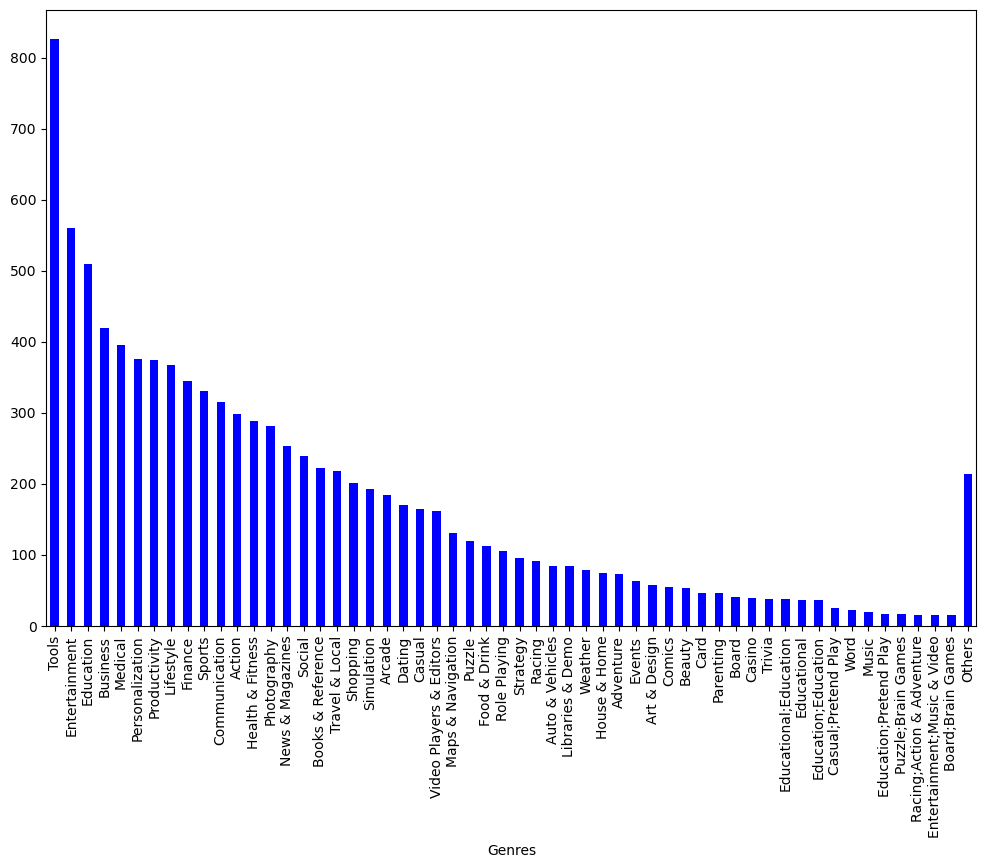

In [116]:
top20 = df_clean['Genres'].value_counts().head(55)

others = df_clean['Genres'].value_counts().iloc[55:].sum()

top20['Others'] = others

top20.plot(figsize=(12,8), kind='bar', color = 'Blue')

In [117]:
print(categorical_features)

['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


<Axes: xlabel='Category'>

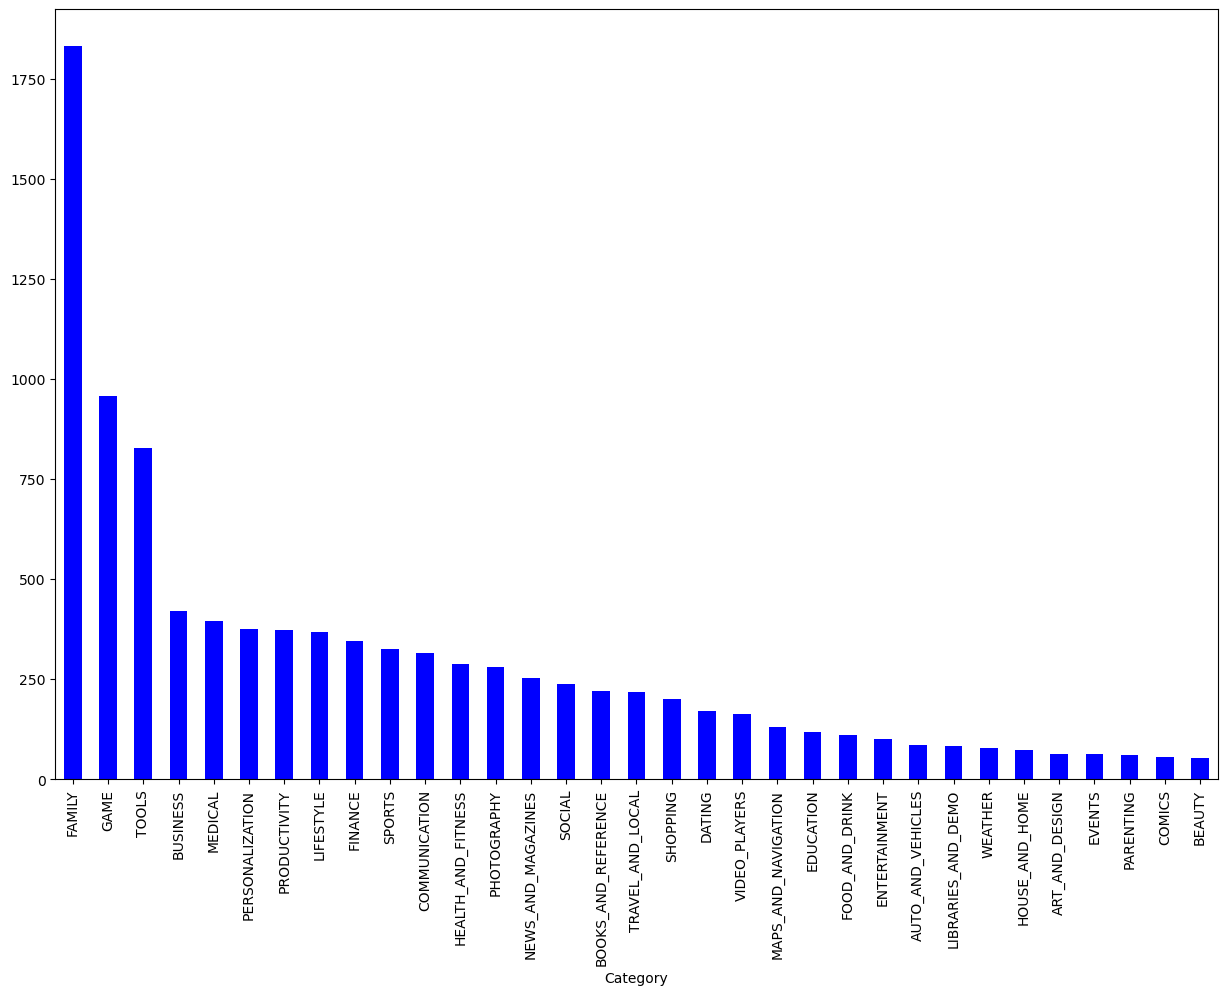

In [118]:
df_clean['Category'].value_counts().plot(figsize = (15,10),kind='bar', color = 'Blue')

In [119]:
df_clean[df_clean['Genres'] == 'Tools']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
3233,Moto File Manager,TOOLS,4.1,38655,5.9,10000000,Free,0.0,Everyone,Tools,2018-02-01,v3.7.93,5.0 and up,2018
3234,Google,TOOLS,4.4,8033493,NaN,1000000000,Free,0.0,Everyone,Tools,2018-08-03,Varies with device,Varies with device,2018
3235,Google Translate,TOOLS,4.4,5745093,NaN,500000000,Free,0.0,Everyone,Tools,2018-08-04,Varies with device,Varies with device,2018
3236,Moto Display,TOOLS,4.2,18239,NaN,10000000,Free,0.0,Everyone,Tools,2018-08-06,Varies with device,Varies with device,2018
3237,Motorola Alert,TOOLS,4.2,24199,3.9,50000000,Free,0.0,Everyone,Tools,2014-11-21,1.02.53,4.4 and up,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,Reindeer VPN - Proxy VPN,TOOLS,4.2,7339,4.0,100000,Free,0.0,Everyone,Tools,2018-05-10,1.74,4.1 and up,2018
10796,Inf VPN - Global Proxy & Unlimited Free WIFI VPN,TOOLS,4.7,61445,7.8,1000000,Free,0.0,Everyone,Tools,2018-07-26,1.9.734,4.1 and up,2018
10800,FR Roster,TOOLS,4.1,174,12000.0,5000,Free,0.0,Everyone,Tools,2018-07-30,6.04,4.4 and up,2018
10807,My FR App,TOOLS,NaN,2,4.2,100,Free,0.0,Everyone,Tools,2018-04-09,1.283.0037,2.3.3 and up,2018


<Axes: xlabel='Price'>

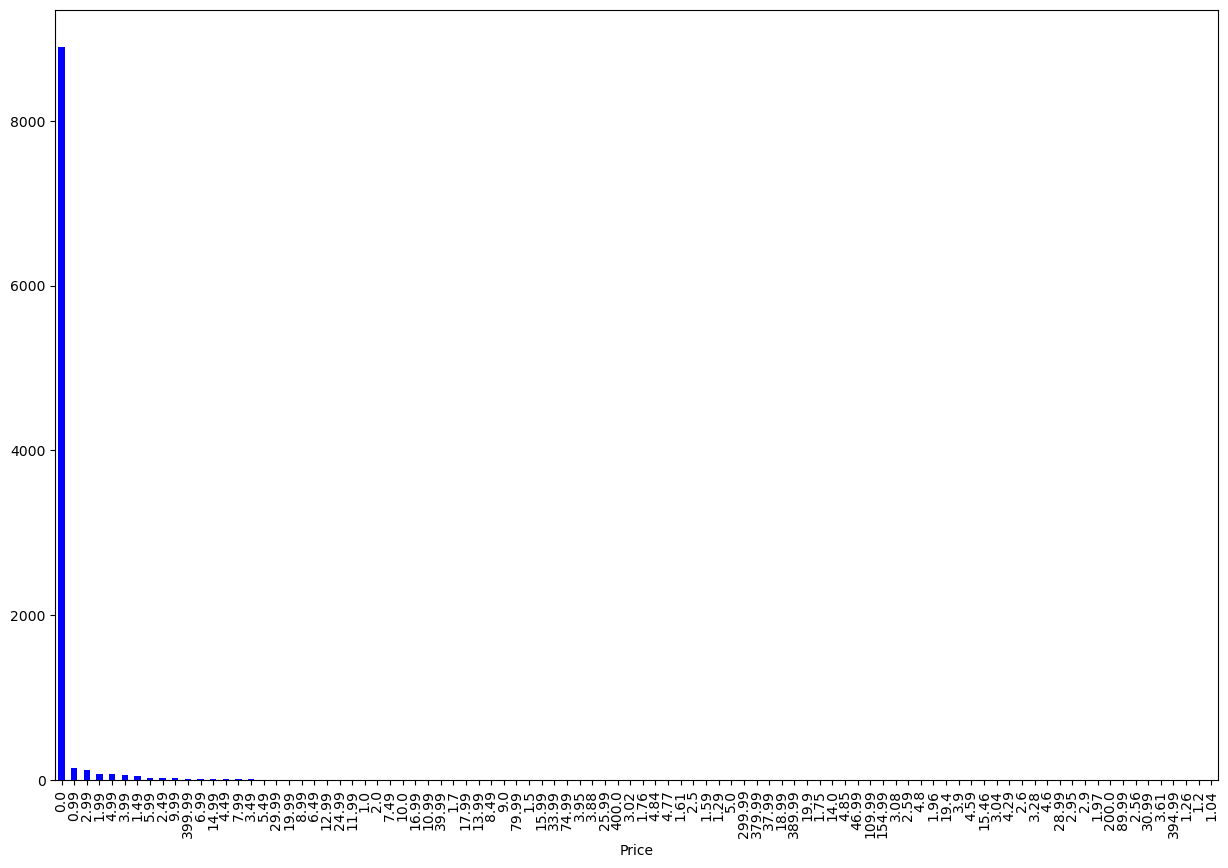

In [120]:
df_clean['Price'].value_counts().plot(figsize = (15,10),kind='bar', color = 'Blue')

In [121]:
df_clean[df_clean['Price'] == 399.99]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
4197,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,399.99,Everyone,Entertainment,2018-07-16,1.0,7.0 and up,2018
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,2018
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,2018
5354,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up,2018
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,2017
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,2017-12-11,1.0,4.1 and up,2017
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,2017-05-01,3.4,4.4 and up,2017
5362,I Am Rich Pro,FAMILY,4.4,201,2.7,5000,Paid,399.99,Everyone,Entertainment,2017-05-30,1.54,1.6 and up,2017
5364,I am rich (Most expensive app),FINANCE,4.1,129,2.7,1000,Paid,399.99,Teen,Finance,2017-12-06,2,4.0.3 and up,2017
5369,I am Rich,FINANCE,4.3,180,3.8,5000,Paid,399.99,Everyone,Finance,2018-03-22,1.0,4.2 and up,2018


<Axes: xlabel='Type'>

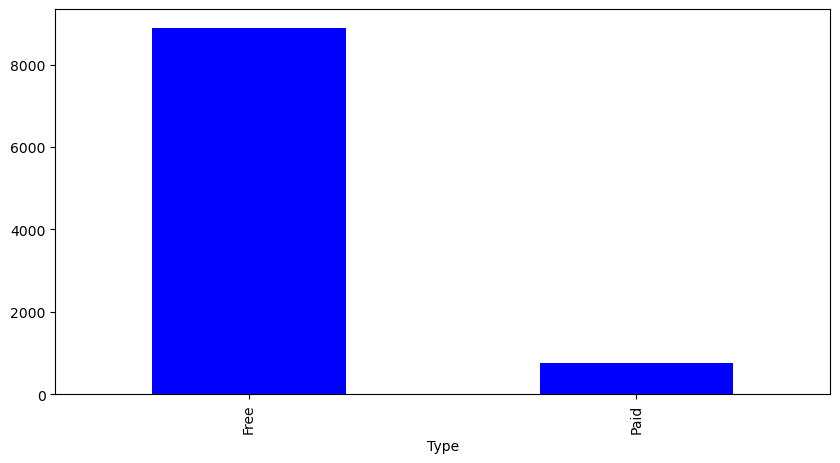

In [122]:
df_clean['Type'].value_counts().plot(figsize = (10,5),kind='bar', color = 'Blue')

<Axes: xlabel='Content Rating'>

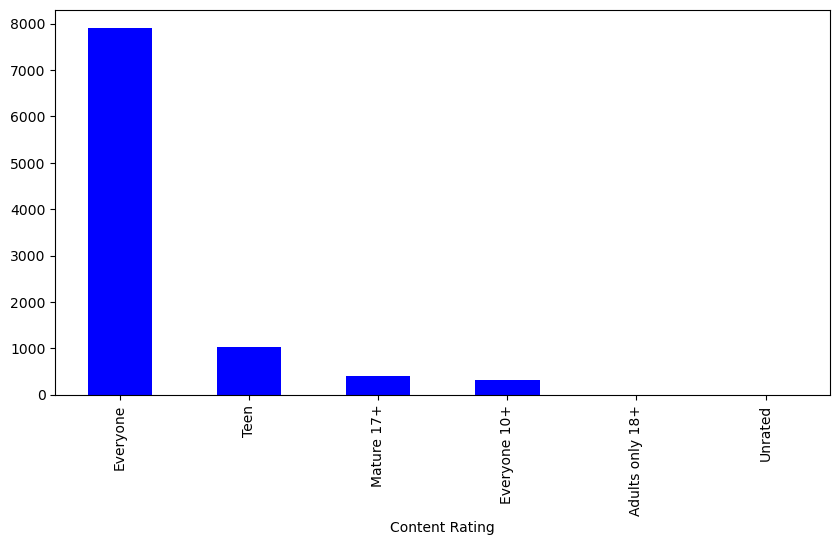

In [123]:
df_clean['Content Rating'].value_counts().plot(figsize = (10,5),kind='bar', color = 'Blue')

In [124]:
df_clean[df_clean['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
7312,Best CG Photography,FAMILY,NaN,1,2.5,500,Free,0.0,Unrated,Entertainment,2015-06-24,5.2,3.0 and up,2015
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4,50000,Free,0.0,Unrated,Tools,2012-02-27,1.3,2.3.3 and up,2012


In [134]:
df_installment = df_clean[df_clean['Installs']>=0]
df_installment

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,2015


<Axes: xlabel='Category'>

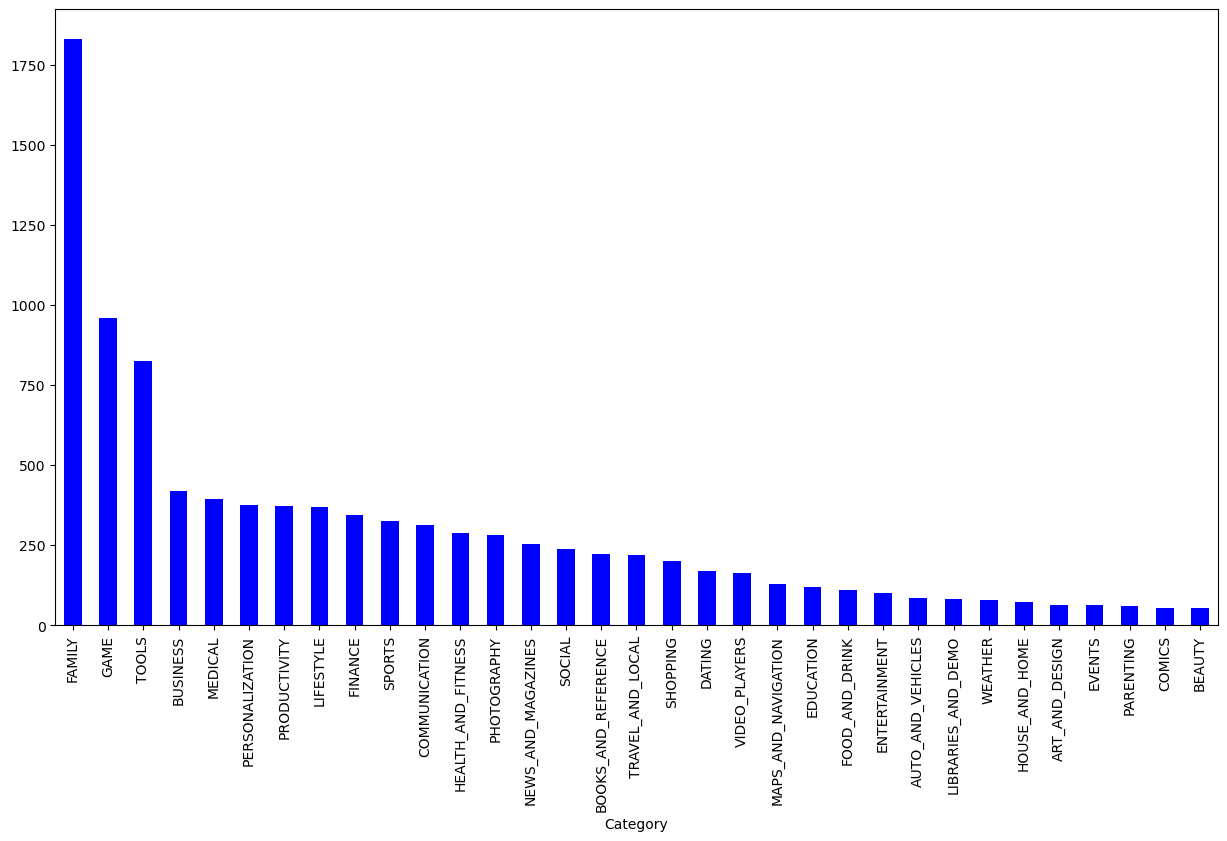

In [135]:
df_installment['Category'].value_counts().plot(kind = 'bar', figsize = (15,8), color = 'Blue')

In [141]:
df_cat_installs = df_clean.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


<Axes: xlabel='Category'>

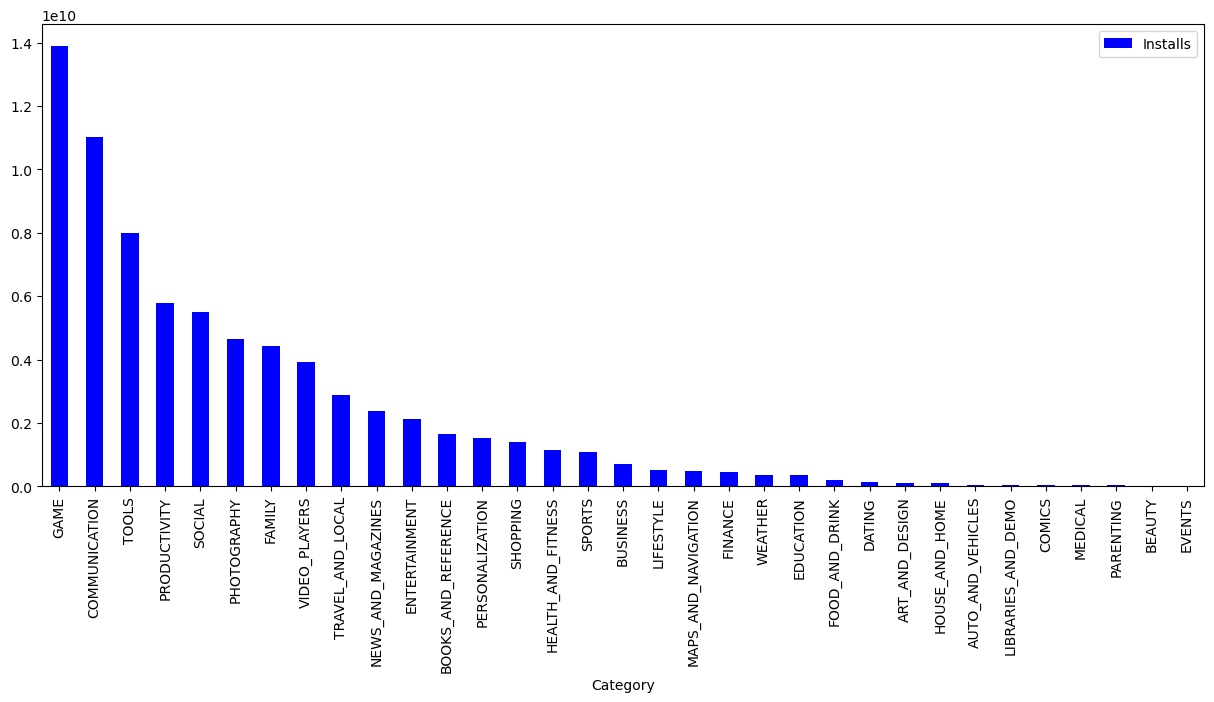

In [143]:
df_cat_installs.plot(x = 'Category',kind='bar', figsize = (15,6), color = 'b')

<Axes: ylabel='Category'>

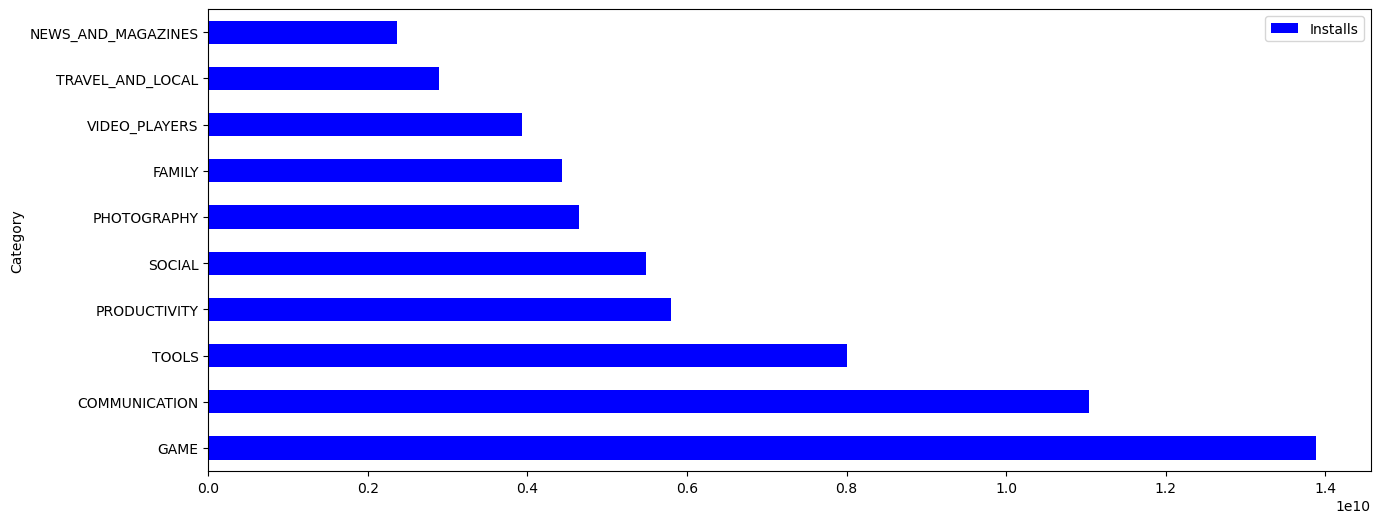

In [147]:
df_top_cat =df_cat_installs.head(10)
df_top_cat.plot(x = 'Category',kind='barh', figsize = (15,6), color = 'b')

In [192]:
df_app_category = df_clean.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
df_app_category = df_app_category.sort_values('Installs', ascending = False)
df_app_category

,Category,App,Installs
9342,TRAVEL_AND_LOCAL,Maps - Navigate & Explore,1000000000
1534,ENTERTAINMENT,Google Play Games,1000000000
9496,VIDEO_PLAYERS,Google Play Movies & TV,1000000000
6388,NEWS_AND_MAGAZINES,Google News,1000000000
1145,COMMUNICATION,Skype - free IM & video calls,1000000000
...,...,...,...
547,BUSINESS,CX Network,0
3661,FINANCE,Eu Sou Rico,0
2211,FAMILY,Command & Conquer: Rivals,0
3662,FINANCE,Eu sou Rico,0


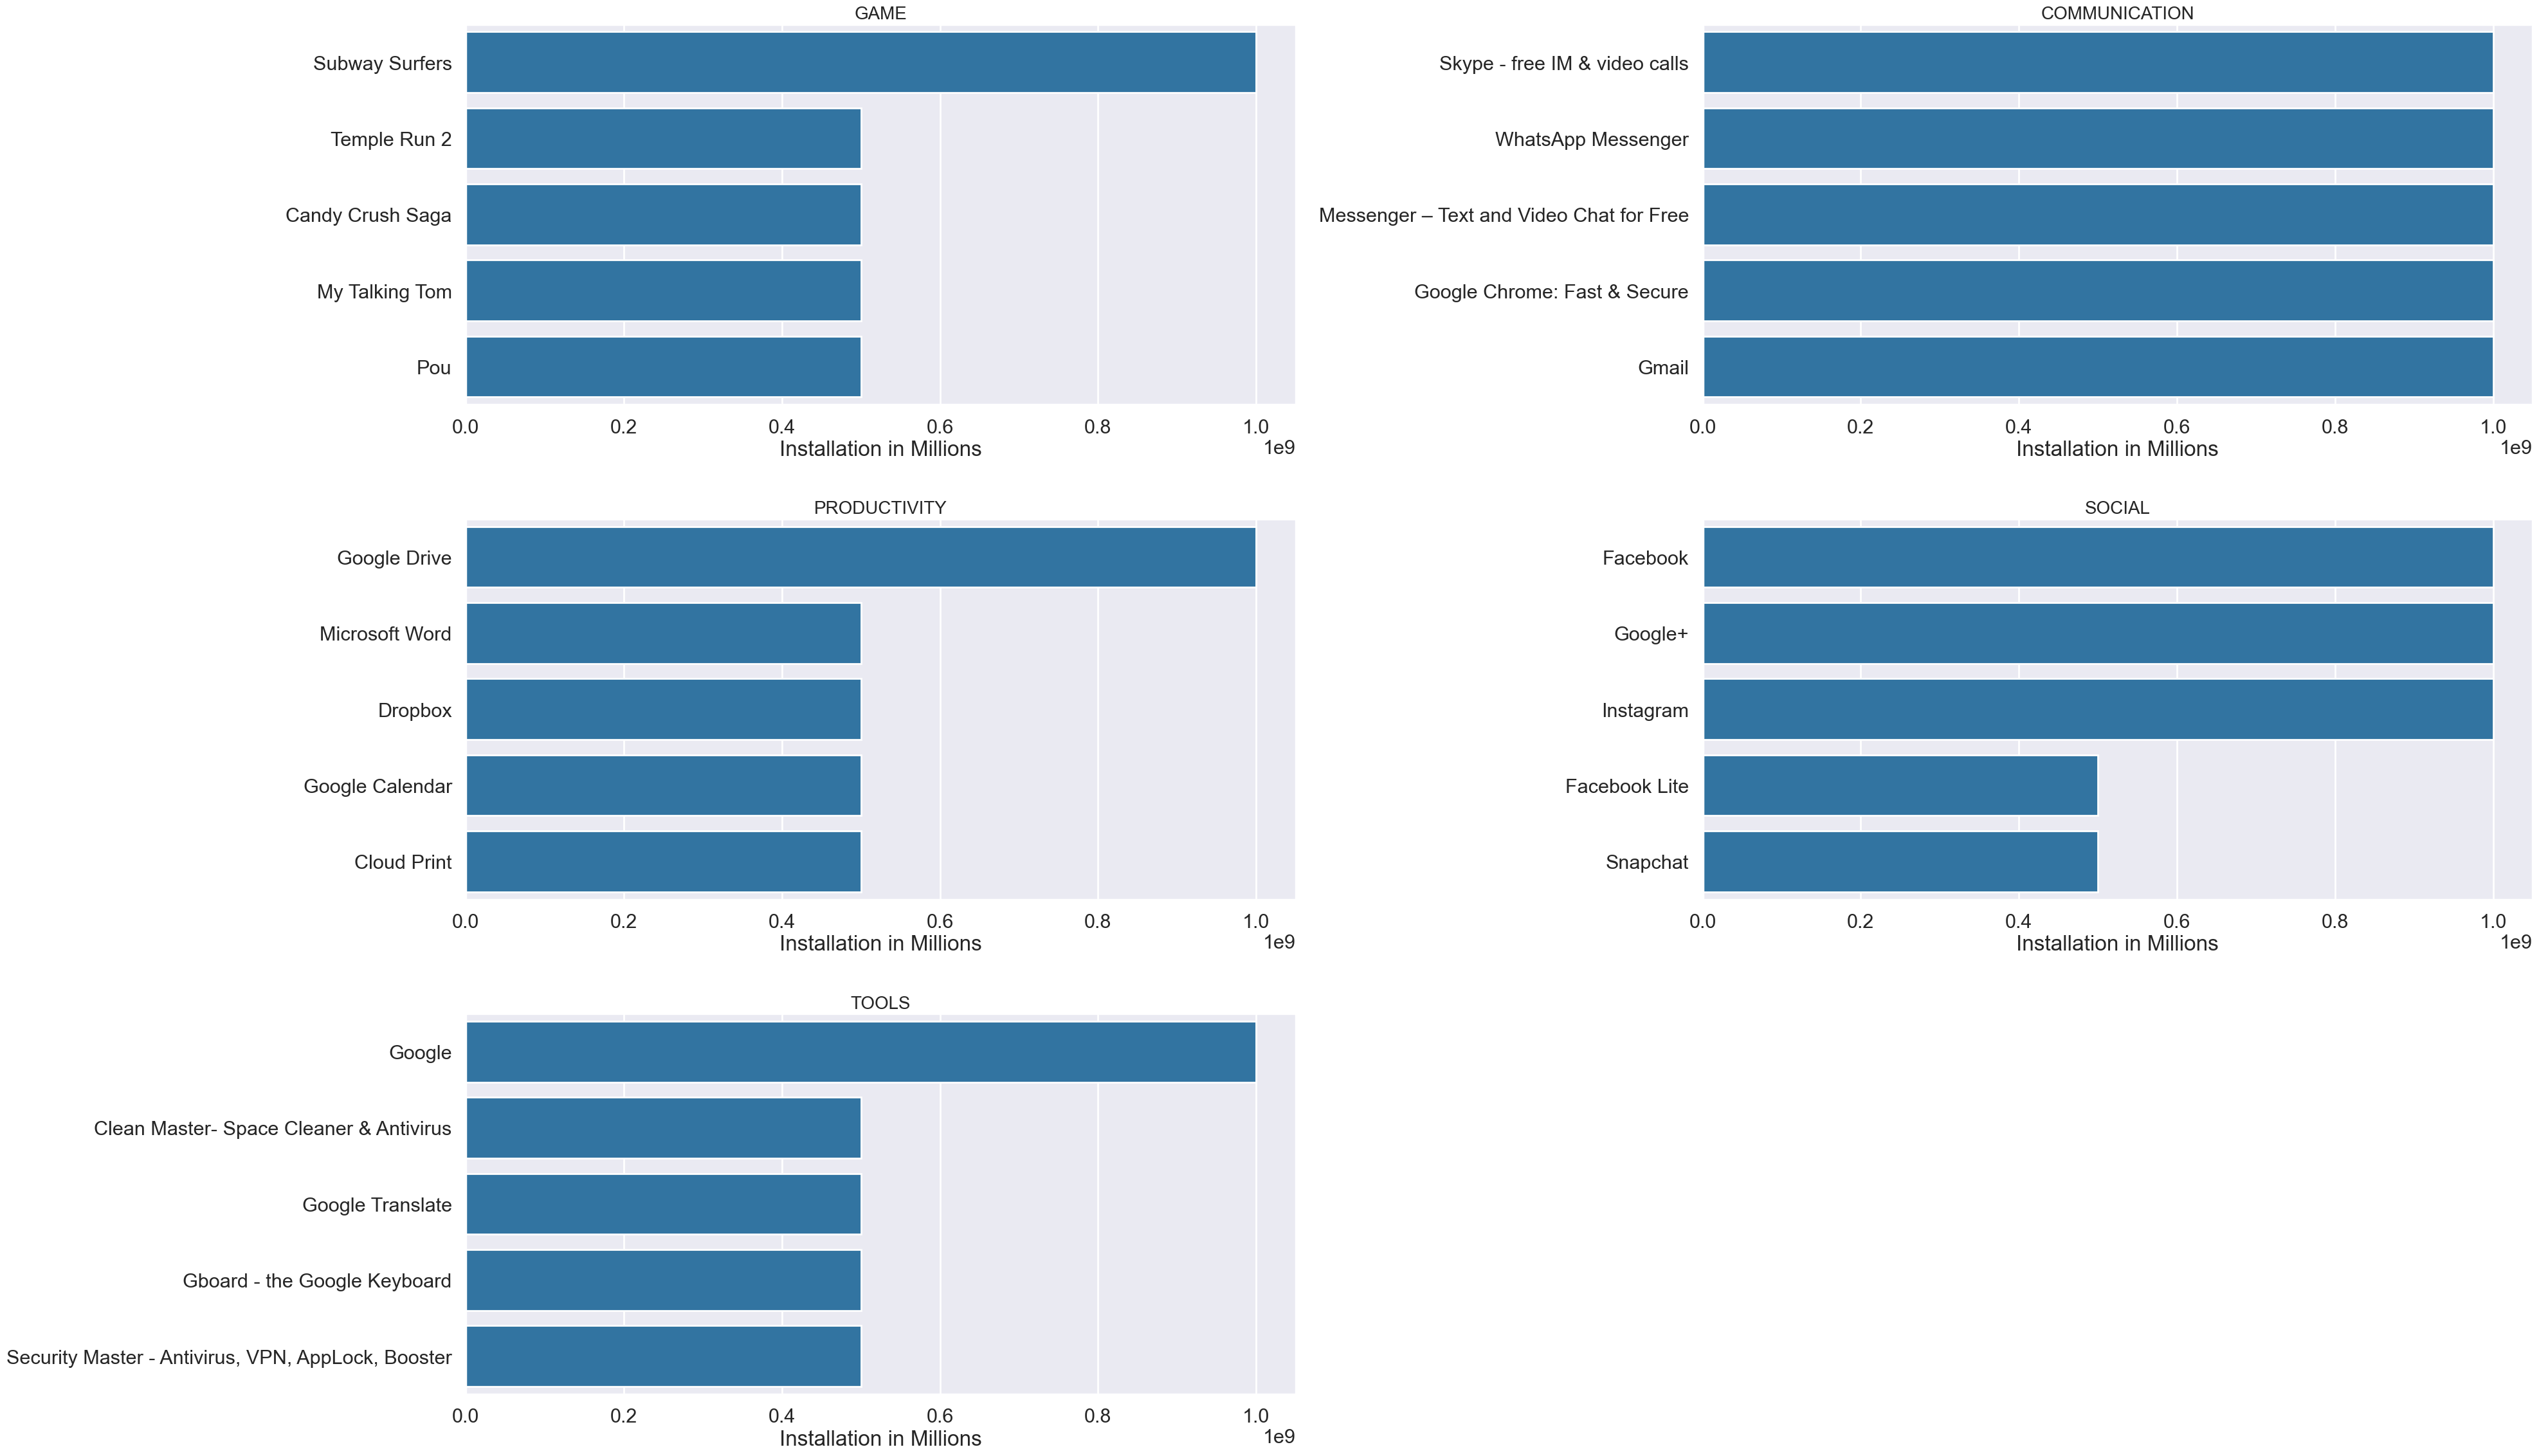

In [193]:
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ,'TOOLS']
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = df_app_category[df_app_category.Category == app]

    #get only 5
    df_top_5 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df_top_5,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [243]:
df_rating_category = df_clean.groupby(['Category', 'App'])['Rating'].mean().reset_index()
df_rating_category = df_rating_category.sort_values('Rating', ascending = False)
df_rating_category

,Category,App,Rating
6239,MEDICAL,Zen Leaf,5.0
864,COMICS,Hojiboy Tojiboyev Life Hacks,5.0
8994,TOOLS,ReactNative BG Geolocation,5.0
5371,LIFESTYLE,AJ Men's Grooming,5.0
5370,LIFESTYLE,AC DC Power Monitor,5.0
...,...,...,...
9622,WEATHER,Skywatch BL,NaN
9623,WEATHER,"St. Petersburg, FL - weather and more",NaN
9631,WEATHER,WSVN • South Florida's Source for Weather,NaN
9638,WEATHER,Weather Data CH,NaN


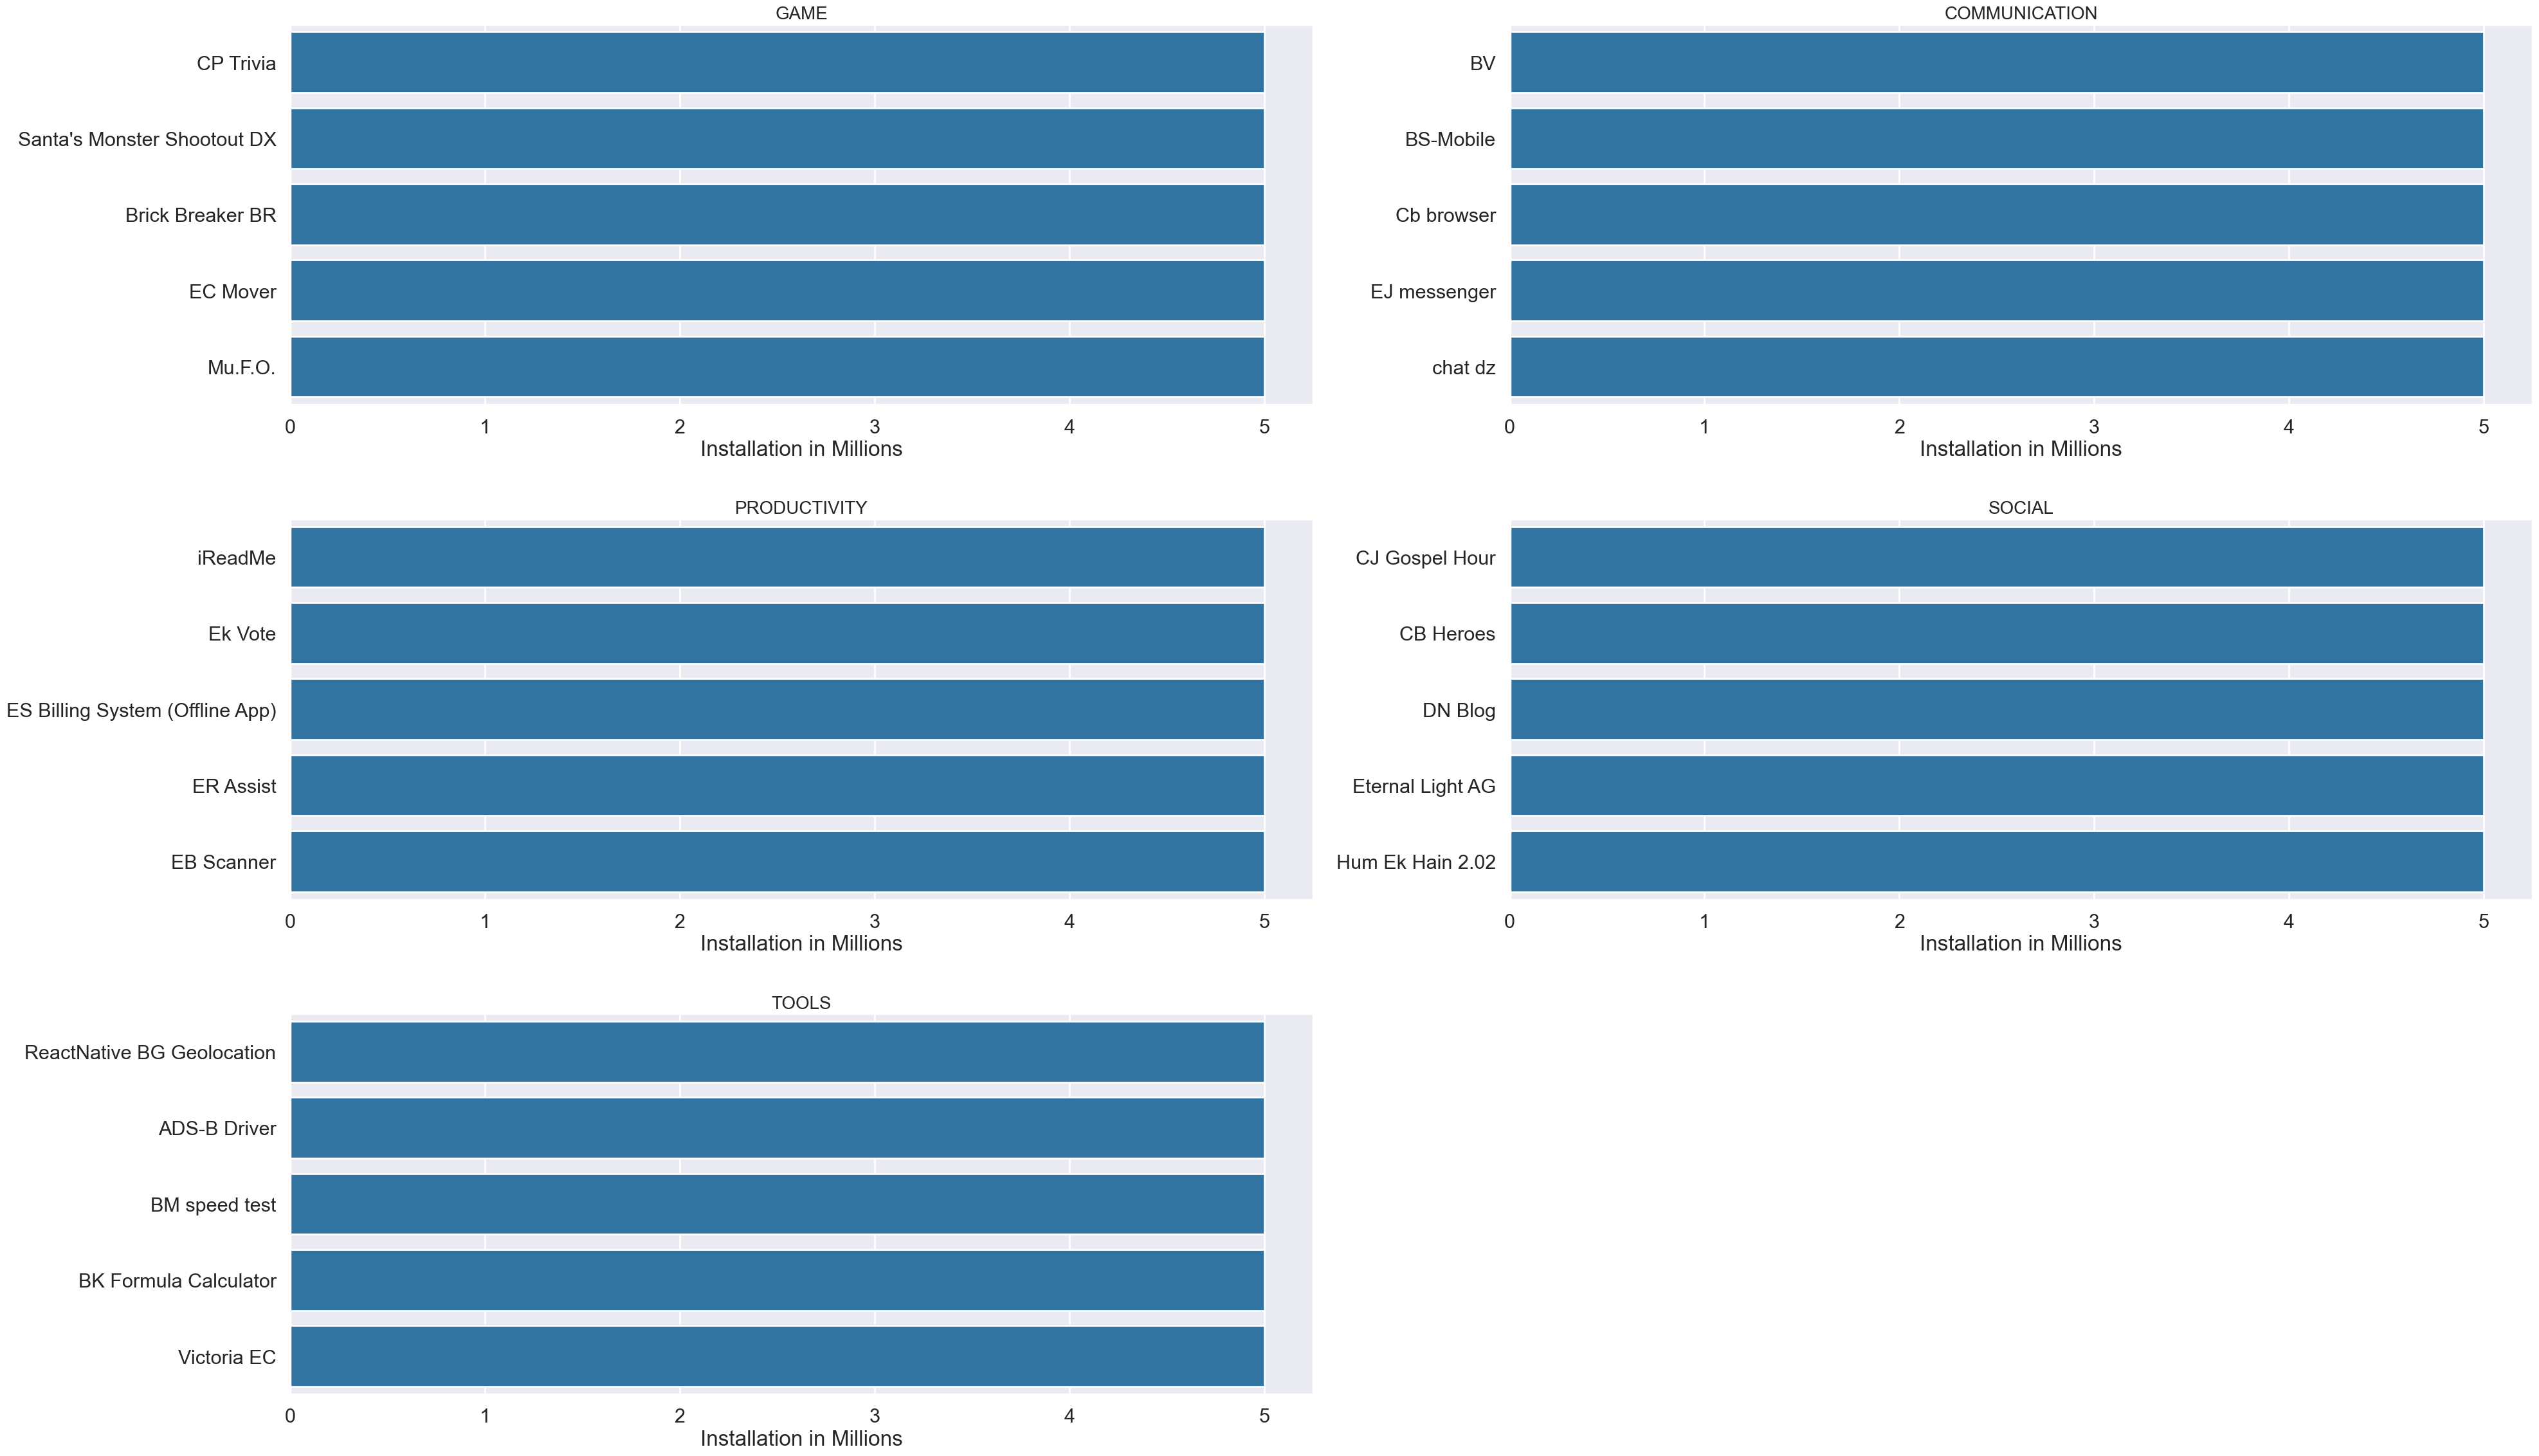

In [244]:
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ,'TOOLS']
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i ,app in enumerate(apps):
    df_sample = df_rating_category[df_rating_category['Category'] == app]
    df_top_rating_5 = df_sample.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data = df_top_rating_5, x = 'Rating', y = 'App')
    plt.xlabel('Average Rating')
    plt.ylabel('')
    plt.title(app,size = 20)

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [236]:
df_rating_category = (
    df_clean
    .groupby(['Category', 'App'])
    .agg({
        'Rating': 'mean',     # Ortalama puan
        'Installs': 'sum'     # Toplam kurulum
    })
    .reset_index()
)


In [237]:
df_rating_category = df_rating_category.sort_values(
    'Installs', ascending=False
)


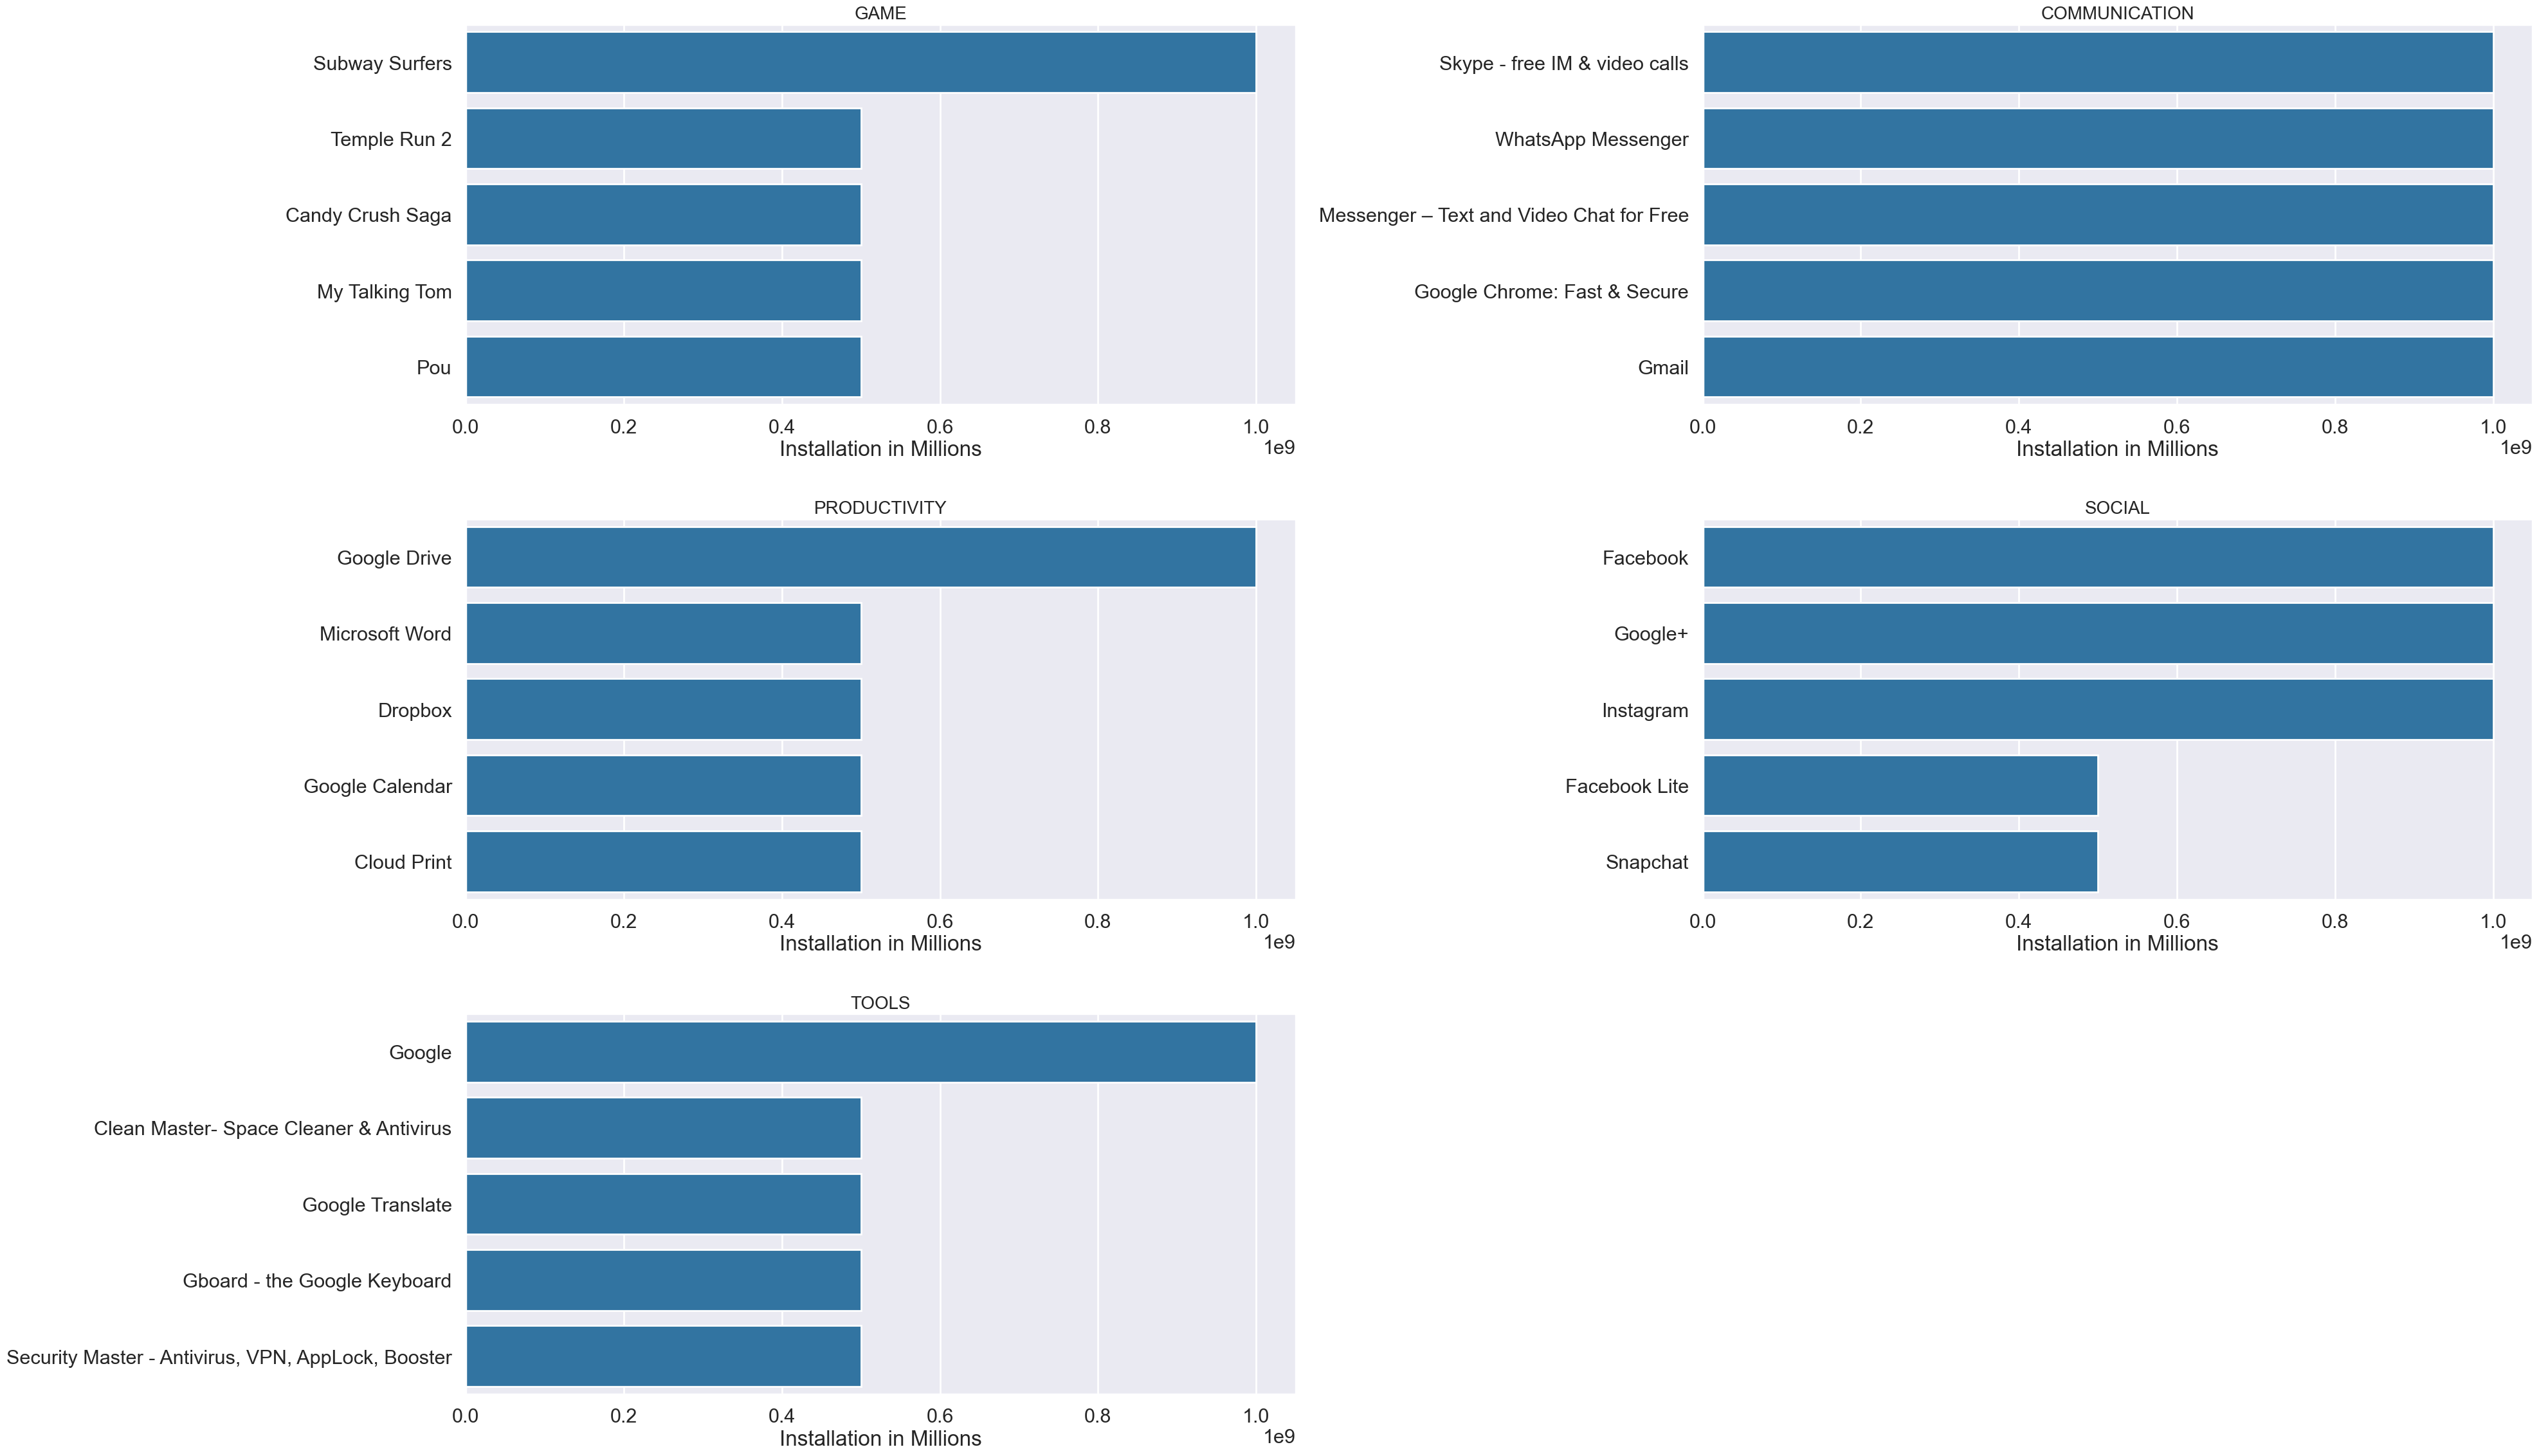

In [238]:
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ,'TOOLS']
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i ,app in enumerate(apps):
    df_sample = df_rating_category[df_rating_category['Category'] == app]
    df_top_rating_5 = df_sample.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data = df_top_rating_5, x = 'Installs', y = 'App')
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [246]:
df_clean.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year'],
      dtype='str')

In [248]:
df_clean['Android Ver'].value_counts()

Android Ver
4.1 and up            2202
4.0.3 and up          1395
4.0 and up            1285
Varies with device     990
4.4 and up             818
2.3 and up             616
5.0 and up             512
4.2 and up             372
2.3.3 and up           273
2.2 and up             239
3.0 and up             231
4.3 and up             221
2.1 and up             133
1.6 and up             116
6.0 and up              54
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [249]:
df_clean['Android Ver'] = df_clean['Android Ver'].replace('and up', '', regex=True)
df_clean['Android Ver'].value_counts()

Android Ver
4.1                   2202
4.0.3                 1395
4.0                   1285
Varies with device     990
4.4                    818
2.3                    616
5.0                    512
4.2                    372
2.3.3                  273
2.2                    239
3.0                    231
4.3                    221
2.1                    133
1.6                    116
6.0                     54
7.0                     42
3.2                     36
2.0                     32
5.1                     22
1.5                     20
4.4W                    11
3.1                     10
2.0.1                    7
8.0                      6
7.1                      3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0                      2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [250]:
df_clean['Android Ver'] = df_clean['Android Ver'].replace('Varies with device', np.nan).replace('W','',regex = True)
df_clean['Android Ver'].value_counts()

Android Ver
4.1              2202
4.0.3            1395
4.0              1285
4.4               829
2.3               616
5.0               512
4.2               372
2.3.3             273
2.2               239
3.0               231
4.3               221
2.1               133
1.6               116
6.0                54
7.0                42
3.2                36
2.0                32
5.1                22
1.5                20
3.1                10
2.0.1               7
8.0                 6
7.1                 3
4.0.3 - 7.1.1       2
5.0 - 8.0           2
1.0                 2
7.0 - 7.1.1         1
4.1 - 7.1.1         1
5.0 - 6.0           1
2.2 - 7.1.1         1
5.0 - 7.1.1         1
Name: count, dtype: int64

In [251]:
df_clean[df_clean['Android Ver'].str.contains('-') == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
350,Web Browser & Explorer,COMMUNICATION,4.0,36901,6.6,5000000,Free,0.0,Everyone,Communication,2018-07-04,11.8.6,4.0.3 - 7.1.1,2018
352,Browser 4G,COMMUNICATION,4.3,192948,6.6,10000000,Free,0.0,Everyone,Communication,2018-06-19,24.6.6,4.0.3 - 7.1.1,2018
1572,ZenUI Safeguard,LIFESTYLE,4.5,100,7.1,1000000,Free,0.0,Everyone,Lifestyle,2018-05-09,1.0.0.21_180410,7.0 - 7.1.1,2018
2841,Photo Collage - Layout Editor,PHOTOGRAPHY,4.5,285788,46000.0,10000000,Free,0.0,Everyone,Photography,2017-12-04,1.8.0.170824_9,5.0 - 8.0,2017
3474,ASUS Quick Memo,PRODUCTIVITY,4.5,23089,1.6,10000000,Free,0.0,Everyone,Productivity,2018-04-11,1.10.0.33_180403,5.0 - 8.0,2018
4151,Google Now Launcher,TOOLS,4.2,857215,7.9,100000000,Free,0.0,Everyone,Tools,2017-12-07,1.4.large,4.1 - 7.1.1,2017
7571,My Style CM 13 Theme,PERSONALIZATION,4.5,314,11000.0,10000,Free,0.0,Everyone,Personalization,2016-09-08,1.9,5.0 - 6.0,2016
9310,EF Jumper,GAME,NaN,4,5.1,100,Free,0.0,Everyone,Arcade,2017-07-13,Build 12,2.2 - 7.1.1,2017
10094,EY Catalyst Reader,BUSINESS,NaN,1,8.4,5,Free,0.0,Everyone,Business,2018-04-10,1.2.1,5.0 - 7.1.1,2018


In [255]:
df_clean = df_clean[df_clean['Android Ver'].str.contains('-') == False]

In [257]:
df_clean.shape

(9650, 14)

In [260]:
df_clean['Android Ver'].value_counts()

Android Ver
4.1       2202
4.0.3     1395
4.0       1285
4.4        829
2.3        616
5.0        512
4.2        372
2.3.3      273
2.2        239
3.0        231
4.3        221
2.1        133
1.6        116
6.0         54
7.0         42
3.2         36
2.0         32
5.1         22
1.5         20
3.1         10
2.0.1        7
8.0          6
7.1          3
1.0          2
Name: count, dtype: int64

In [264]:
main_genres_encoded = df_clean.groupby(['Genres'])['Installs'].mean() / 1000000
main_genres_encoded

Genres
Action                                   11.648961
Action;Action & Adventure                 4.418375
Adventure                                 4.064319
Adventure;Action & Adventure             21.230000
Adventure;Brain Games                     0.100000
                                           ...    
Video Players & Editors                  24.178412
Video Players & Editors;Creativity        5.000000
Video Players & Editors;Music & Video     7.500000
Weather                                   4.570893
Word                                      7.355328
Name: Installs, Length: 118, dtype: float64

In [265]:
main_genres_encoded = main_genres_encoded.to_dict()
main_genres_encoded

{'Action': 11.64896050167224,
 'Action;Action & Adventure': 4.418375,
 'Adventure': 4.064319452054795,
 'Adventure;Action & Adventure': 21.23,
 'Adventure;Brain Games': 0.1,
 'Adventure;Education': 10.0,
 'Arcade': 20.519830901639345,
 'Arcade;Action & Adventure': 3.229285785714286,
 'Arcade;Pretend Play': 1.0,
 'Art & Design': 1.974177192982456,
 'Art & Design;Action & Adventure': 0.1,
 'Art & Design;Creativity': 0.285,
 'Art & Design;Pretend Play': 0.5,
 'Auto & Vehicles': 0.625061305882353,
 'Beauty': 0.5131518867924528,
 'Board': 2.732370975609756,
 'Board;Action & Adventure': 2.001666666666667,
 'Board;Brain Games': 0.5254733333333333,
 'Board;Pretend Play': 0.0001,
 'Books & Reference': 7.504367459459459,
 'Books & Reference;Creativity': 0.0001,
 'Books & Reference;Education': 0.0055,
 'Business': 1.6638779474940335,
 'Card': 3.2516191489361703,
 'Card;Action & Adventure': 5.5,
 'Casino': 3.3400179487179487,
 'Casual': 18.502004484848484,
 'Casual;Action & Adventure': 11.92315384

In [266]:
df_clean['Genres Encoded'] = df_clean['Genres'].map(main_genres_encoded)
df_clean.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Genres Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,2018,1.974177
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,2018,0.500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,2018,1.974177
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,2018,1.974177
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,2018,0.285000


In [267]:
df_clean.to_csv("C:/Users/Mehmet Ersolak/Documents/GitHub/Data_Science_Project/Analyzing Google Play Apps/Data_Setml_ready_dataset.csv", index=True)